In [5]:
import random
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("kmeans.csv")
df = df.drop("NAME",axis=1)
df = df.drop("country", axis=1)
df.head()

,WEEK1,WEEK2,WEEK3,WEEK4,WEEK5,WEEK6,WEEK7,WEEK8,WEEK9,WEEK10,...,WEEK21,WEEK22,WEEK23,WEEK24,WEEK25,WEEK26,WEEK27,WEEK28,WEEK29,WEEK30
0,0.123482,0.139439,0.159255,0.183535,0.213221,0.248241,0.288648,0.332659,0.377043,0.415235,...,0.143242,0.135678,0.127986,0.119827,0.111538,0.103295,0.095282,0.087750,0.080663,0.074390
1,0.137908,0.152515,0.170004,0.191075,0.216237,0.245960,0.279953,0.316109,0.350143,0.375008,...,0.097015,0.093298,0.090307,0.087542,0.084758,0.081993,0.079178,0.076369,0.073733,0.071297
2,0.257368,0.289447,0.327889,0.369377,0.410650,0.447043,0.470739,0.473261,0.448527,0.396913,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.430645,0.480111,0.538215,0.601643,0.665106,0.719614,0.754032,0.757150,0.721512,0.646794,...,0.036211,0.037839,0.039890,0.041806,0.043230,0.044041,0.044238,0.000000,0.000000,0.000000
4,0.344219,0.386321,0.436241,0.492567,0.552187,0.609480,0.657114,0.686768,0.690730,0.663020,...,0.119087,0.117188,0.115130,0.112285,0.108617,0.104367,0.099783,0.095190,0.090738,0.086676


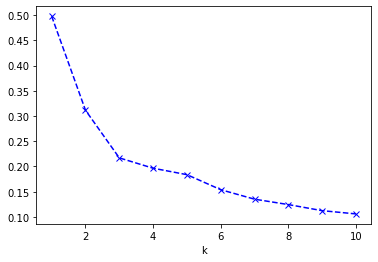

In [18]:
#To determine how many clusters will be used in the cluster analysis

K = range(1,11)

meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    meandistortions.append(
    sum(
        np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'),axis=1)
    ) / df.shape[0])

plt.plot(K, meandistortions, 'bx--')
plt.xlabel('k')
plt.show()

#We set 6 clusters based on the result

In [19]:
#K-means cluster analysis

k_means=KMeans(init='k-means++', n_clusters=6, max_iter=500)
k_means.fit(df)
label = k_means.fit_predict(df)
label

array([4, 0, 5, 1, 1, 5, 1, 1, 5, 1, 5, 5, 5, 5, 5, 5, 4, 1, 0, 1, 2, 4,
       5, 1, 2, 2, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 0, 0, 4, 4, 4, 4, 4, 0,
       0, 0, 4, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 2, 0, 3, 3,
       2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 0, 3, 0, 2, 2, 3, 3, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 2, 3, 2, 3, 3, 3, 3, 0, 2, 3, 0,
       3, 3, 0, 2, 3, 0, 3, 2, 2, 3, 3, 0, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3,
       2, 2, 2, 2, 3, 3, 2, 3, 2, 2])

In [25]:
dat_type = pd.DataFrame(label)
dat_type.columns = ["type"]
dat = pd.merge(df, dat_type, left_index=True, right_index=True)
pd.set_option('display.max_rows',None)
dat.head()

,WEEK1,WEEK2,WEEK3,WEEK4,WEEK5,WEEK6,WEEK7,WEEK8,WEEK9,WEEK10,...,WEEK22,WEEK23,WEEK24,WEEK25,WEEK26,WEEK27,WEEK28,WEEK29,WEEK30,type
0,0.123482,0.139439,0.159255,0.183535,0.213221,0.248241,0.288648,0.332659,0.377043,0.415235,...,0.135678,0.127986,0.119827,0.111538,0.103295,0.095282,0.087750,0.080663,0.074390,4
1,0.137908,0.152515,0.170004,0.191075,0.216237,0.245960,0.279953,0.316109,0.350143,0.375008,...,0.093298,0.090307,0.087542,0.084758,0.081993,0.079178,0.076369,0.073733,0.071297,0
2,0.257368,0.289447,0.327889,0.369377,0.410650,0.447043,0.470739,0.473261,0.448527,0.396913,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
3,0.430645,0.480111,0.538215,0.601643,0.665106,0.719614,0.754032,0.757150,0.721512,0.646794,...,0.037839,0.039890,0.041806,0.043230,0.044041,0.044238,0.000000,0.000000,0.000000,1
4,0.344219,0.386321,0.436241,0.492567,0.552187,0.609480,0.657114,0.686768,0.690730,0.663020,...,0.117188,0.115130,0.112285,0.108617,0.104367,0.099783,0.095190,0.090738,0.086676,1


In [27]:
dat.to_csv(r'F:\movement\Paper\revision1\RESULT\cluster.csv',index=False)

In [30]:
dat2 = dat.groupby('type').mean()
dat2.to_csv(r'F:\movement\Paper\revision1\RESULT\cluster_mean.csv',index=False)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [44]:
#plot the result
df = pd.read_csv(r"F:\movement\Paper\revision1\RESULT\cluster_mean.csv")
df.head()

,TIME,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6
0,1,0.110459,0.395336,0.061199,0.098259,0.103164,0.277129
1,2,0.121346,0.444497,0.057704,0.099010,0.123846,0.313872
2,3,0.131490,0.501283,0.053881,0.099937,0.143249,0.357393
3,4,0.143823,0.562496,0.050492,0.101753,0.164116,0.406412
4,5,0.159115,0.624533,0.048426,0.105322,0.189974,0.456977


In [45]:
#define x and y
x = df.TIME
y1 = df.Cluster1
y2 = df.Cluster2
y3 = df.Cluster3
y4 = df.Cluster4
y5 = df.Cluster5
y6 = df.Cluster6

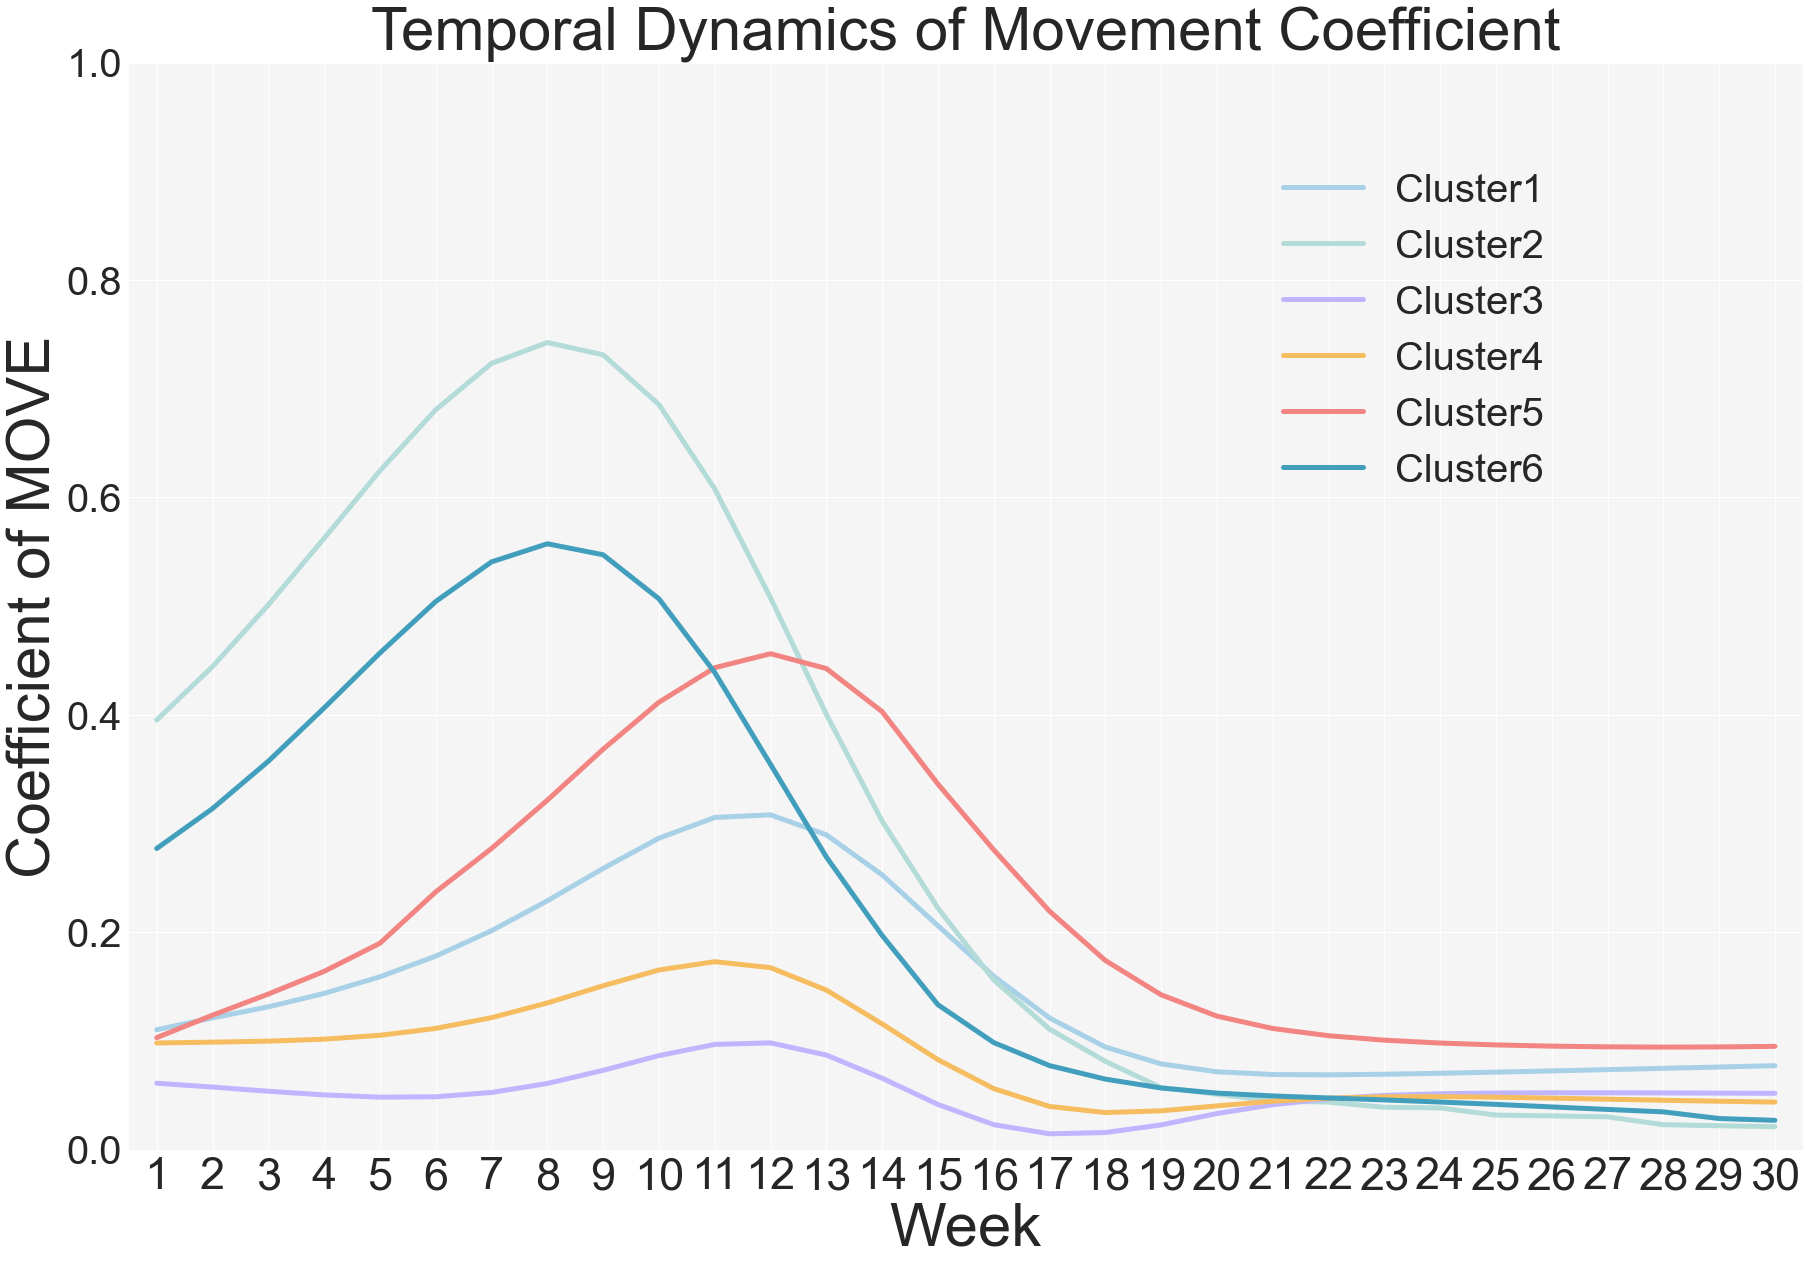

In [55]:
#define fig size
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(111,facecolor='whitesmoke')

#set x and y
plt.xticks(rotation=0,size=45)
plt.yticks(size = 40)
plt.xlabel('Week',fontsize=60)
plt.style.use('seaborn')

#plot coefficient
line1 = ax1.plot(x,y1,linewidth=5,c='#A8D1E7',label='Cluster1')
ax1.set_ylim(0,1) #set y axis from 0 to 1
ax1.set_xlim(0.5,30.5)
ax1.set_ylabel('Coefficient of MOVE',fontsize=60)

line2 = ax1.plot(x,y2,linewidth=5,c='#B3DBD8',label='Cluster2')
ax1.set_ylim(0,1) #set y axis from 0 to 1
ax1.set_xlim(0.5,30.5)

line3 = ax1.plot(x,y3,linewidth=5,c='#C0B6FF',label='Cluster3')
ax1.set_ylim(0,1) #set y axis from 0 to 1
ax1.set_xlim(0.5,30.5)

line4 = ax1.plot(x,y4,linewidth=5,c='#F6BD60',label='Cluster4')
ax1.set_ylim(0,1) #set y axis from 0 to 1
ax1.set_xlim(0.5,30.5)

line5 = ax1.plot(x,y5,linewidth=5,c='#F28482',label='Cluster5')
ax1.set_ylim(0,1) #set y axis from 0 to 1
ax1.set_xlim(0.5,30.5)

line6 = ax1.plot(x,y6,linewidth=5,c='#429EBD',label='Cluster6')
ax1.set_ylim(0,1) #set y axis from 0 to 1
ax1.set_xlim(0.5,30.5)

fig.legend(fontsize=40,loc=(0.7,0.6)) #legend
plt.title('Temporal Dynamics of Movement Coefficient',fontsize=60)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.savefig(r"F:\movement\Paper\revision1\figure\Cluster_coef.jpg")